In [1]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.ndimage.interpolation import shift
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
# target 두 개로..
Y_digit = train['digit']
Y_dig_l = train['digit'].astype(str)+train['letter']

In [4]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

code = np.array(Y_dig_l)

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(code)

In [5]:
train = train.drop(['id','digit','letter'],axis=1)
test = test.drop(['id','letter'],axis=1)

In [6]:
# convert from integers to floats
train = train.astype('float32')
test = test.astype('float32')
# normalize to range 0-1
train /= 255.0
test /= 255.0

In [7]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
print(train.shape)
print(test.shape)

(2048, 28, 28, 1)
(20480, 28, 28, 1)


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(train,vec, test_size = 0.2, random_state=32)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1638, 28, 28, 1)
(410, 28, 28, 1)
(1638,)
(410,)


# Data Augmentation

[참고한 링크](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

## Feature Standardization

In [10]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)

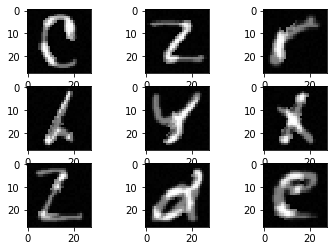

In [11]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## ZCA Whitening
- 그림만 봐도 whitening은 숫자 featurer 뽑아내는데 도움이 될 것 같지 않음.

C:\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


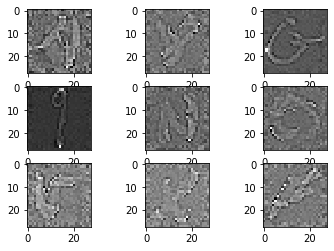

In [12]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Rotation

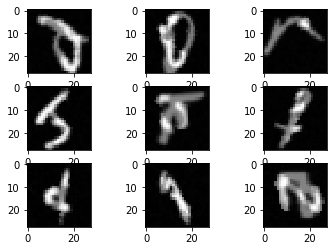

In [13]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Shift

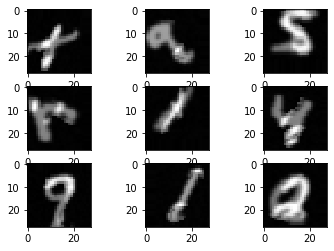

In [14]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Flips
- flip한 이미지를 넣는 것이 도움이 될지는 의문

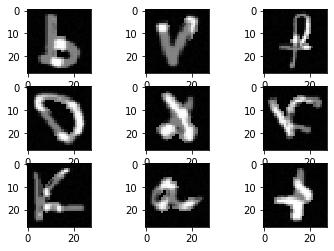

In [15]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## Random Zoom

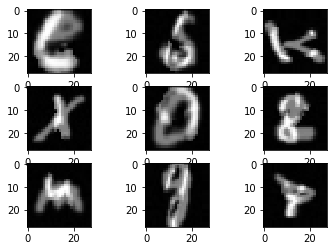

In [16]:
# define data preparation
datagen = ImageDataGenerator(zoom_range=0.3)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

## 한꺼번에

In [17]:
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

## Model

In [18]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(260, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               2704500   
_________________________________________________________________
dense_2 (Dense)              (None, 260)               130260    
Total params: 2,835,080
Trainable params: 2,835,080
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=30), 
                    epochs=50, # one forward/backward pass of training data
                    steps_per_epoch=X_valid.shape[0]//30, # number of images comprising of one epoch
                    validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.


ValueError: Error when checking target: expected dense_2 to have shape (260,) but got array with shape (1,)

In [ ]:
y_valid.nunique()